In [0]:
import pandas as pd

In [53]:
# pegamos o DataSet diretamente do GitHub e colocamos no DataFrame chamado filmes; Depois mostramos os 5 primeiros com o .head()
filmes = pd.read_csv('https://raw.githubusercontent.com/JoaoPedro-Ramos/Data-Science_Movies/master/Doc_Aula_01/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
?filmes # Documentação reduzida

In [55]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/JoaoPedro-Ramos/Data-Science_Movies/master/Doc_Aula_01/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [56]:
# mostramos o formato do dataframe (quantidade de linhas, quantidade de colunas)
avaliacoes.shape 

(100836, 4)

In [57]:
# pegar só o a quantidade de linhas
len(avaliacoes)

100836

In [58]:
# renomeando o nome das colunas
avaliacoes.columns = ['usuárioID', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuárioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [59]:
# Visão geral sobre o dataframe avaliacoes
avaliacoes.describe()

,usuárioID,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [60]:
# visualizar uma coluna especifica 
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [61]:
# agrupando os filmes com groupby e pegando a nota média 
notas_media_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
notas_media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [64]:
# Juntando o dataframe: filmes com a série: Notas_media_por_filme
# on = nome da coluna
filmes_com_media = filmes.join(notas_media_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [70]:
# alterando o nome da coluna "nota" para "media de notas"
filmes_com_media.columns = ['filmeId', 'titulo', 'genero', 'media de notas']
filmes_com_media.head()

,filmeId,titulo,genero,media de notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [73]:
filmes_com_media.sort_values('media de notas', ascending=False).head(15)

,filmeId,titulo,genero,media de notas
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


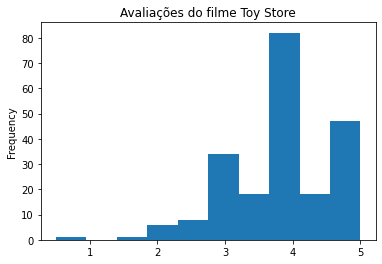

In [81]:
# plotando as notas do filme 1

import matplotlib.pyplot as plt

avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist', title='Avaliações do filme Toy Store')

plt.show()


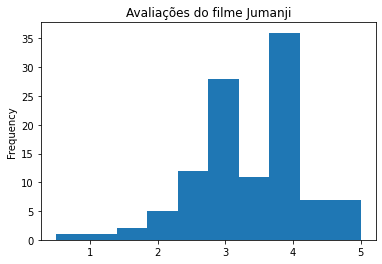

In [82]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist', title='Avaliações do filme Jumanji')
plt.show()

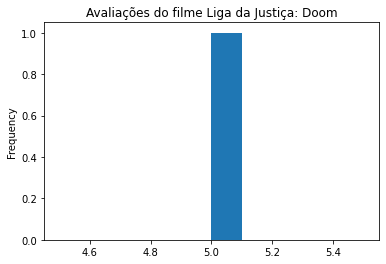

In [84]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind='hist', title='Avaliações do filme Liga da Justiça: Doom')
plt.show()